In [1]:
# DATA-23500, Spring Semester, 2023
# NAME: Stephen Feddes
# PROGRAMMING ASSIGNMENT #3

%matplotlib inline
import pandas as pd
import numpy as np
import re # Provides the tools for performing regular expressions
from matplotlib import pyplot as plt

cps_df = pd.read_csv("cps.csv")

In [2]:
def Get_Lowest_Grade_Offered(Grades_Offered):
    
    lowest_grade_offered = ""

    for c in Grades_Offered.replace(" ", ""):
        # Based on the column's pattern, once a "-" or "," is reached, the lowest grade being offered is found.
        if c == "-" or c == ",":
            break
        else:
            # If the grade is PK, then we need to add P to the string, and then K. In either case, the grade is known by the
            # time a "," is reached.
            lowest_grade_offered += c
    
    # Before I made the function, I examined the various datatypes and value counts. I was surprised to see that "PE" was
    # listed as a grade. I assume it was a mistake, so I decided to replace it with "PK". If you disagree with my decision,
    # let me know and I will adjust this function accordingly.
    if lowest_grade_offered == "PE":
        lowest_grade_offered = "PK"
        
    # After this function was applied to the column, I examined the value counts of it. There were no strange values.
    
    return lowest_grade_offered

In [3]:
def Get_Highest_Grade_Offered(Grades_Offered):
    
    highest_grade_offered = ""
    
    # Rather than keep searching from the beginning up to the "-" or ",", start searching from the end. This finds the highest
    # grade being offered.
    for c in reversed(Grades_Offered):
        if c == "-" or c == ",":
            break
        else:
            highest_grade_offered += c
    
    # Because we reversed the big string initially, we need to reverse the substring so that its valid.
    return highest_grade_offered[::-1]

In [4]:
def Get_Starting_Time(School_Hours):
    
    # This regular expression returns the start time by finding the first substring that could be interpreted as a time.
    # EXAMPLE: "M,W,F 08-3" returns the 8. That 8 is then formatted so that it looks like 8:00AM.
    # EXAMPLE: "09:15-11:00AM" returns 9:15AM.
    # EXAMPLE: "7:31 AM to 9:00PM" returns 7:31AM
    # EXAMPLE: "8:00 AM - 4:00 PM" returns 8:00 AM
    # I suggest you try some of these examples and some of your own. I think you'll find my regular expression very robust.
    School_Hours = re.search("[0-9]?\d:?\d?\d?\s*(\w\w)?", str(School_Hours).upper().replace(".", ""))
    
    # What complicates things is that some schools start at different times depending on the day. However, I can only
    # return one starting time. Rather than get the average of the different starting times or returning them as a list, I
    # decided to return the first starting time.
    
    
    # Manipulates the returned time so that all the times for the School_Hours column are in a consistent format
    # That format is: (n)n:00AM/PM where n is a digit.
    if School_Hours != None:
        Start_Hour = School_Hours.group().upper()
        Start_Hour = Start_Hour.lstrip("0")
        Start_Hour = Start_Hour.replace(" ", "")
       
        if ":" not in Start_Hour:
            Start_Hour = Start_Hour.replace("AM", "")
            Start_Hour = Start_Hour.replace("PM", "")
            Start_Hour+=":00"
            
        # If AM or PM is not specified for the Start_Hour, then assume it starts in AM. An 8 PM to 3 PM school makes no sense.
        if "AM" not in Start_Hour and "PM" not in Start_Hour:
            Start_Hour+="AM"
      
        return Start_Hour

In [5]:

# Applies the functions defined above to the appropriate columns in order to generate the new ones.
cps_df["Lowest_Grade_Offered"] = cps_df["Grades_Offered"].apply(Get_Lowest_Grade_Offered)
cps_df["Highest_Grade_Offered"] = cps_df["Grades_Offered"].apply(Get_Highest_Grade_Offered)
cps_df["Starting_Hour"] = cps_df["School_Hours"].apply(Get_Starting_Time)

# Makes the dataframe include only the relevant columns, which were specified in the program instructions
cps_df = cps_df[["School_ID", "Short_Name", "Is_High_School", "Zip", "Student_Count_Total", "College_Enrollment_Rate_School", 
                 "Lowest_Grade_Offered", "Highest_Grade_Offered", "Starting_Hour"]]

# Because you do not say whether or not a 0 in the Student_Count_Total should be treated as a null value, I will assume
# that if a 0 was entered in that column, it means that school is either brand new or has closed. I will not treat is as null.

# For the number columns, I replaced any NaN's with the mean of the column. For the "Starting_Hour" column, I used the mode
# because it was more elegant and seemed appropriate. 
cps_df.fillna({"Student_Count_Total": cps_df.mean()["Student_Count_Total"],
               "College_Enrollment_Rate_School": cps_df.mean()["College_Enrollment_Rate_School"],
               "Starting_Hour": cps_df["Starting_Hour"].mode()[0]}, inplace=True)

cps_df.head(10)

C:\Users\sfedd\AppData\Local\Temp/ipykernel_1344/2530782742.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cps_df.fillna({"Student_Count_Total": cps_df.mean()["Student_Count_Total"],
C:\Users\sfedd\AppData\Local\Temp/ipykernel_1344/2530782742.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "College_Enrollment_Rate_School": cps_df.mean()["College_Enrollment_Rate_School"],


,School_ID,Short_Name,Is_High_School,Zip,Student_Count_Total,College_Enrollment_Rate_School,Lowest_Grade_Offered,Highest_Grade_Offered,Starting_Hour
0,609952,GREENE,False,60609,415,58.084302,PK,5,8:00AM
1,609869,LANGFORD,False,60636,241,58.084302,PK,8,8:15AM
2,609896,DRUMMOND,False,60622,346,58.084302,PK,8,8:30AM
3,610590,BRONZEVILLE CLASSICAL,False,60609,91,58.084302,K,2,7:45AM
4,610087,BLAIR,False,60638,248,58.084302,PK,2,7:30AM
5,610503,FRAZIER PROSPECTIVE,False,60624,198,58.084302,K,8,7:45AM
6,400164,INSTITUTO - LOZANO HS,True,60608,78,21.900000,9,12,8:30AM
7,610059,MAYER,False,60614,760,58.084302,PK,8,8:30AM
8,610206,TWAIN,False,60638,1094,58.084302,PK,8,8:30AM
9,609872,PEREZ,False,60608,318,58.084302,PK,8,8:00AM


In [6]:
def Time_To_Minutes(Starting_Hour):
    
    # This function converts a time like 8:00 AM to its corresponding time in minutes. 12:00 AM starts at 0 minutes, and 
    # 11:59 PM ends at 1439 minutes. It's easier to plot a number instead of a time, so that is why I am using this function.
    
    hour_part = Starting_Hour.split(":")[0]
    
    if "AM" in Starting_Hour:
        minutes = (int(hour_part)%12)*60
    else:
        minutes = (int(hour_part)%12)*60 + 12*60
        
    minute_part = int(re.sub("\wM", "",Starting_Hour.split(":")[1]))
    
    minutes += minute_part
    
    return minutes  

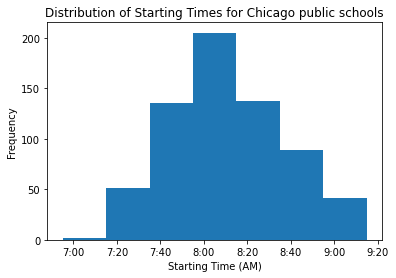

In [7]:
# Graphs a histogram of all Chicago public school's start times

plt.xlabel('Starting Time (AM)')
plt.ylabel('Frequency')
plt.title('Distribution of Starting Times for Chicago public schools')

plt.style.use('fivethirtyeight')

cps_df["Starting_Hour_In_Minutes"] = cps_df["Starting_Hour"].apply(Time_To_Minutes)
start_times_in_minutes = cps_df["Starting_Hour_In_Minutes"]

plt.hist(start_times_in_minutes, bins=[415,435,455,475,495,515,535,555])
plt.xticks([420,440,460,480,500,520,540,560], ('7:00', '7:20', '7:40', '8:00', '8:20', '8:40', '9:00', '9:20'))

plt.show()

In [887]:
# Gets the average college enrollment rate for high schools
avg_rate = np.mean(cps_df[cps_df.Is_High_School == True].College_Enrollment_Rate_School)

# Gets the population standard deviation for college enrollment rates among high schools. I am assumming this data is a not
# a sample based on the fact that it seems this data is from all Chicago public schools.
rate_std = np.std(cps_df[cps_df.Is_High_School == True].College_Enrollment_Rate_School)

print(f"The mean college enrollment rate for Chicago public high schools is {round(avg_rate,2)}%")
print(f"The standard deviation in college enrollment rates among Chicago public high schools is {round(rate_std,2)}%")

The mean college enrollment rate for Chicago public high schools is 58.08%
The standard deviation in college enrollment rates among Chicago public high schools is 25.0%


In [888]:
# Gets the average student count total among non-high schools
avg_count = np.mean(cps_df[cps_df.Is_High_School == False].Student_Count_Total)

# Gets the population standard deviation for student count total among non-high schools. I am assumming this data is a not
# a sample based on the fact that it seems this data is from all Chicago public schools.
count_std = np.std(cps_df[cps_df.Is_High_School == False].Student_Count_Total)

print(f"The mean student total among Chicago public schools, high schools excluded, is {round(avg_count,2)}")
print(f"The standard deviation in student totals among Chicago public schools, high schools excluded, is {round(count_std,2)}")

The mean student total among Chicago public schools, high schools excluded, is 521.55
The standard deviation in student totals among Chicago public schools, high schools excluded, is 268.35


In [889]:
# Creates a series of true-falses that correspond the various rows. This series is used to filter out the rows that are in the
# Loop Neighborhood.

# isin checks if a column value is in the list. The "~" in front flips it so that a row returns false if its Zip is in the list.
# I checked the Pandas documentation to find it.
filt = ~cps_df["Zip"].isin([60601,60602,60603,60604,60605,60606,60607,60616]) # isin checks if a column value is in the list.

schools_outside = cps_df.loc[filt].shape[0] # Gets the number of schools in the filtered dataframe.

print(f"There are {schools_outside} Chicago public schools outside of the Loop Neighborhood")

There are 634 public schools outside of the Loop Neighborhood
